In [36]:
import numpy as np
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams.update({'figure.dpi':120, 
                     'font.family':'serif', 
                     "font.size":25, 
                     'text.usetex':True,
                     "xtick.direction": "in", 
                     "ytick.direction": "in"})


In [40]:
fname="/Users/mariamac/Dropbox/Mac/Downloads/tis_poligonais/tis_poligonais.shp"
mname="/Users/mariamac/Dropbox/Mac/Downloads/BR_UF_2020/BR_UF_2020.shp" 

df=gpd.read_file(fname)
dfm=gpd.read_file(mname)

In [37]:
cmap = LinearSegmentedColormap.from_list('mycmap', ['black', 'crimson', 'darkcyan'])

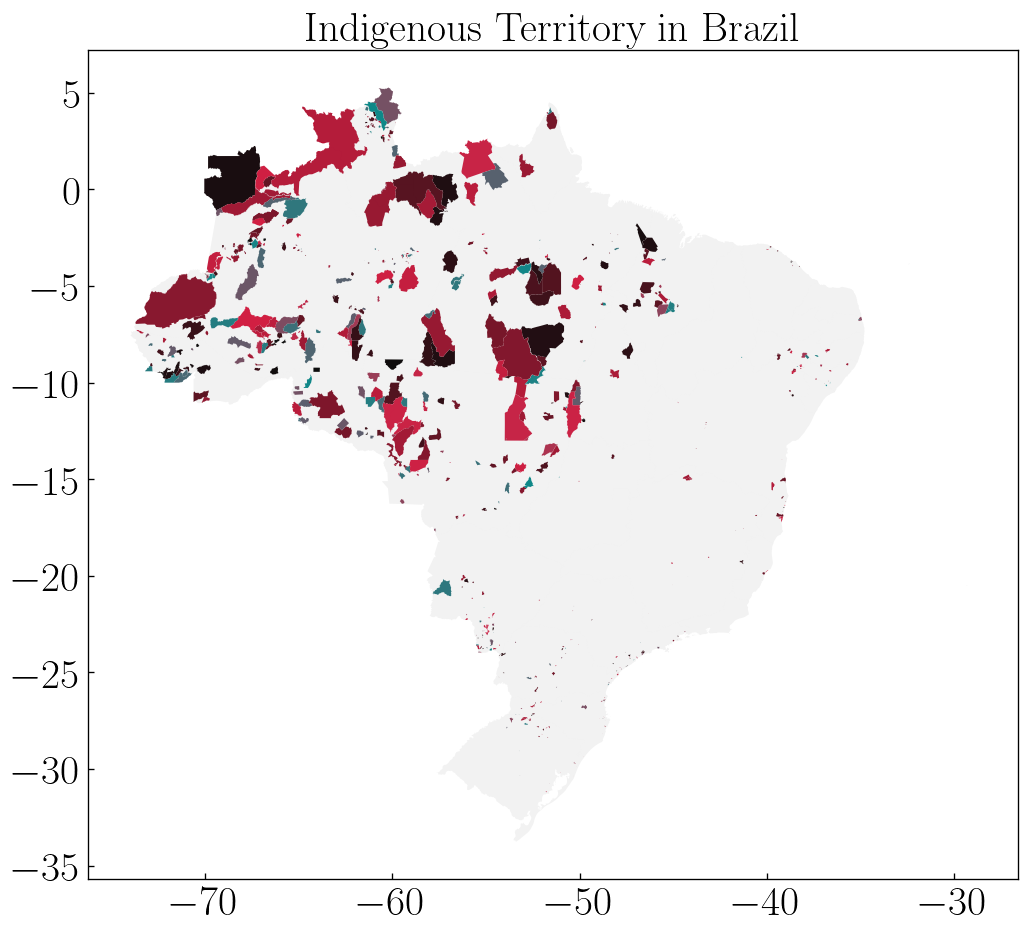

In [45]:
fig, ax = plt.subplots(figsize = (10,10))

df.plot(ax=ax, cmap =cmap) #cmap = "viridis") # color='crimson')
dfm.plot(ax=ax, color="grey", alpha=0.1)

ax.set_title("Indigenous Territory in Brazil", fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [4]:
fname2 = "/Users/mariamac/Dropbox/Mac/Downloads/tis_poligonais_AM/tis_poligonais.shp"

In [5]:
df2=gpd.read_file(fname2)

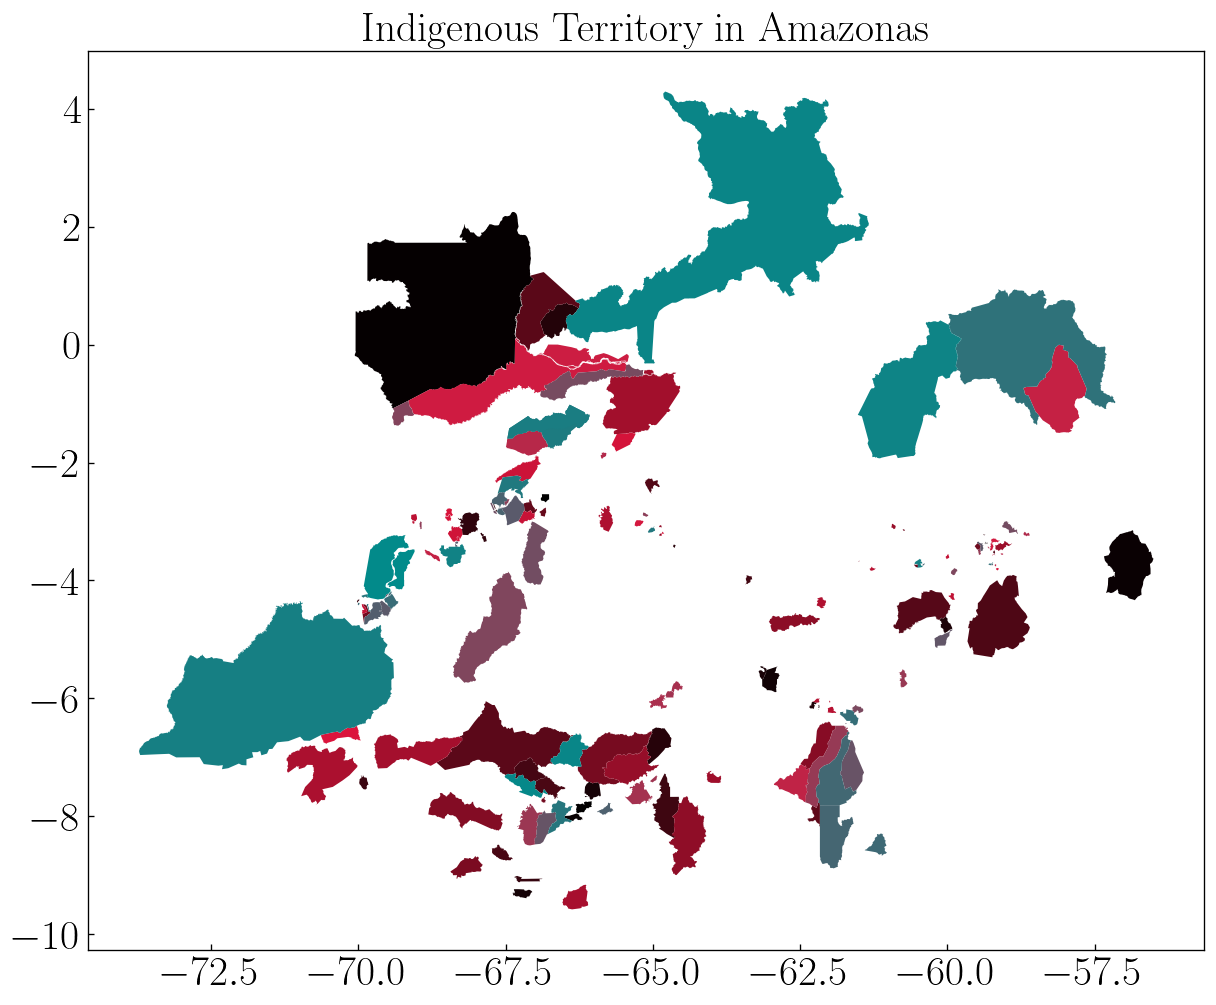

In [39]:
fig, ax = plt.subplots(figsize = (12,10))

df2.plot(ax=ax, cmap =cmap) #cmap = "viridis") #color='darkcyan')

ax.set_title("Indigenous Territory in Amazonas", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.show()

In [7]:
#Following: https://gis.stackexchange.com/questions/218450/getting-polygon-areas-using-geopandas
df2.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
df2.head(2)

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,data_atual,epsg,geometry
0,1,101,Acapuri de Cima,Kokama,Fonte Boa,AM,18393.9411,Homologada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL DO ALTO SOLIMOES,Não,3.020200e+10,COORDENACAO REGIONAL DO ALTO SOLIMOES,CR-AS,t,05/09/2023,0,"POLYGON ((-66.88359 -2.53752, -66.87457 -2.537..."
1,2,201,Acimã,Apurinã,Lábrea,AM,40686.0340,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MÉDIO PURUS,Não,3.020200e+10,COORDENACAO REGIONAL MÉDIO PURUS,CR-Mpur,t,None,0,"POLYGON ((-66.30929 -7.79995, -66.30929 -7.799..."


In [9]:
#Now copy your GeoDataFrame and change the projection to a Cartesian system

df2_copy = df2.copy()
df2_copy = df2_copy.to_crs({'init': 'epsg:3857'})

print(df2_copy.crs)

/Users/mariamac/miniconda3/envs/mariaenv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


+init=epsg:3857 +type=crs


In [10]:
df2_copy.head(2)

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,data_atual,epsg,geometry
0,1,101,Acapuri de Cima,Kokama,Fonte Boa,AM,18393.9411,Homologada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL DO ALTO SOLIMOES,Não,3.020200e+10,COORDENACAO REGIONAL DO ALTO SOLIMOES,CR-AS,t,05/09/2023,0,"POLYGON ((-7445447.325 -282567.946, -7444442.6..."
1,2,201,Acimã,Apurinã,Lábrea,AM,40686.0340,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MÉDIO PURUS,Não,3.020200e+10,COORDENACAO REGIONAL MÉDIO PURUS,CR-Mpur,t,None,0,"POLYGON ((-7381516.585 -870980.465, -7381516.4..."


In [11]:
#Now the area in square kilometers

df2_copy["area"] = df2_copy['geometry'].area/ 10**6
df2_copy.head(2)

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,data_atual,epsg,geometry,area
0,1,101,Acapuri de Cima,Kokama,Fonte Boa,AM,18393.9411,Homologada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL DO ALTO SOLIMOES,Não,3.020200e+10,COORDENACAO REGIONAL DO ALTO SOLIMOES,CR-AS,t,05/09/2023,0,"POLYGON ((-7445447.325 -282567.946, -7444442.6...",183.089106
1,2,201,Acimã,Apurinã,Lábrea,AM,40686.0340,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MÉDIO PURUS,Não,3.020200e+10,COORDENACAO REGIONAL MÉDIO PURUS,CR-Mpur,t,None,0,"POLYGON ((-7381516.585 -870980.465, -7381516.4...",416.608133


In [12]:
fname3 = "/Users/mariamac/Dropbox/Mac/Downloads/terrabrasilis_legal_amazon_5_10_2023_1699143303350.csv"

df3 = pd.read_csv(fname3, sep=';')  

In [13]:
df3

,year,area km²,indi
0,2022,"0,00",Maraitá
1,2022,"0,00",Trincheira
2,2022,"0,00",Paukalirajausu
3,2022,"0,00",Cajuhiri Atravessado
4,2022,"0,00",Padre
...,...,...,...
5800,2008,"0,07",Alto Rio Purus
5801,2008,"0,08",Paumari do Lago Paricá
5802,2008,"0,15",Ponciano
5803,2008,"0,08",Trincheira


In [14]:
msk = (df3["indi"]=="Acapuri de Cima") 

In [15]:
df3[msk]

,year,area km²,indi
170,2022,"0,00",Acapuri de Cima
540,2021,"0,00",Acapuri de Cima
955,2020,"0,00",Acapuri de Cima
1333,2019,"0,00",Acapuri de Cima
1738,2018,"0,00",Acapuri de Cima
2130,2017,"0,00",Acapuri de Cima
2502,2016,"0,00",Acapuri de Cima
2916,2015,"0,00",Acapuri de Cima
3275,2014,"0,00",Acapuri de Cima
3659,2013,"0,00",Acapuri de Cima


In [16]:
#Number of Indigenous Territories in Amazonas' state 
len(df2)

148

In [17]:
#Number of Indigenous Territories in Amazonia Legal (compost by 9 states)
len(df3["indi"].unique())

381

In [18]:
len(df2["terrai_nom"])

148

In [19]:
len(df2["terrai_nom"].unique())

147

In [20]:
#I realize there is a duplicated in df2['terrai_nom']!!!

mk = df2_copy.duplicated(subset=['terrai_nom'])

In [21]:
df2_copy["terrai_nom"][mk]

138    Uneiuxi
Name: terrai_nom, dtype: object

In [22]:
mask = df2_copy["terrai_nom"] == 'Uneiuxi'

In [23]:
df2_copy[mask]

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,data_atual,epsg,geometry,area
137,110,48102,Uneiuxi,"Tukano,Makú","Japurá,Santa Isabel do Rio Negro",AM,554730.4117,Homologada,Tradicionalmente ocupada,Reestudo,COORDENACAO REGIONAL DO RIO NEGRO,Não,3.020200e+10,COORDENACAO REGIONAL DO RIO NEGRO,CR-RNG,t,None,0,"POLYGON ((-7475769.711 -137767.111, -7475761.3...",5555.563178
138,111,48101,Uneiuxi,"Tukano,Makú","Japurá,Santa Isabel do Rio Negro",AM,403182.8081,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL DO RIO NEGRO,Não,3.020200e+10,COORDENACAO REGIONAL DO RIO NEGRO,CR-RNG,t,None,0,"POLYGON ((-7369893.053 -154833.795, -7369955.2...",4044.450898


In [24]:
df2_copy = df2_copy.drop_duplicates(subset=['terrai_nom'])

In [25]:
len(df2_copy)

147